# Section 2: Deep Learning Architectures:

## Chapters: 

- Chapter 2: Metrics-Based Methods
- Chapter 3: Model-Based Methods
- Chapter 4: Optimization-Based Methods



# Chapter 2: Metrics-Based Methods

## **Parametric Methods**


##### Topics being covered: 
- Parametric methods
- Siamese Networks
- Matching Networks

In short, they try to learn the joint probabilistic distribtuion of the data and their labels. 

The parameters that are learned are the equation given by the joint probabilistic distribution. 

**Example:**
Logistic Regression 

- It is a discriminative classifier 
  - Focus on P(Y|X).

We are essentially trying to do the following:
- F(X,Y) = argmax P (Y=c|X)

- Since P(Y|X) is a categorical distribution, the goal is to learn the distribution of categories. 


### Neural Networks - Learning Procedure

- Minimize the objective function ( loss function) with SGD. 

#### **Loss Functions** 

|**Classification** | **Regression**|
|-------------------|:---------------|
| Categorical cross-entropy | mean squared error|
|0-1 loss|root mean squared error|
|Hinge Loss| Huber Loss|


### Visualizing Parameters

- NN's learn parameters via SGD.
- Complexity of features increases through the layers. 

### **Understanding Siamese Networks**
- Architecture with two parallel layers. 
  - These are identical! 
- Compares two inputs based on similarity metric. 
- Uses contrastive loss function 
  - Can also use Triplet Loss

**STEPS**:
1. Training: (one dataset)
  - Learn the image embeddings using supervised metric-approach 
2. Testing: (another dataset)
  - Reuse features for OSL. 


### Other notes on Siamese Networks:
Why aren't we training the layers separately??
- Since we add a high number of parameters in every layer, sharing w&b is beneficial to optimize the network. 
- To make sure that two similar images won't be mapped to two different locations in the feature embedding space. 

### Loss Functions 

1. Contrastive Loss Function
  - We have two different examples: 
    - Image1, Image2, and from here we calculate the following 
    - L(Y,X1,X2,W) = (1-Y) * (1/2)D_w^2 + (Y)(1/2)max(0,m-D_w)^2
    - margin, m, is also added just in case. 
    - It works, but it doesn't learn the decision boundaries as well as the triplet loss function. 
2. Triplet Loss Function 
  - We have three different samples: 
    - Anchor, Positive, Negative 
      - Anchor: Positive Sample
        - Can also be negative 
      - Positive: Same as Anchor
      - Negative: Opposite of Anchor
  - Final loss depends on the distance between the anchor and the positive, the anchor and the negative seen as this: 
    - d(A,N) - d(A,P) + alpha =< 0
      - Where alpha is a margin which allows the Loss function not to learn the trivial results (f(x) = 0, X in All Reals)
  - Converges faster. It learns the following decision boundary

![Triplet Loss Function](Triplet_Loss.png)

##### **Feature Embedding space**

**Latent Space:** A hidden or directly unobservable space, from which a higher dimensional representation can be drawn. 

**Embeddings:** A higher dimensional representation mapped (embedded) from the lower-dimensional data.

When it says that it ensures that two similar images will be mapped to different locations in the feature embedding space, it refers to the following:

- Since they are similar images, they can be drawn from a similar, or same, latent space. 
- Coming from the same latent space, they should be mapped to similar/same locations in the embedding space. 





## Siamese Network Architecture 

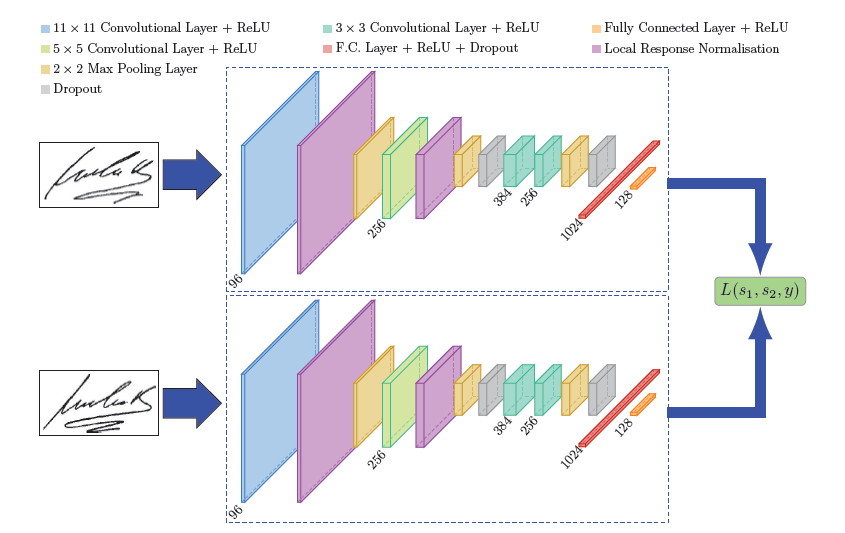

In the Siamese Network we arent classifying, rather we are discriminating the two images in similarity. This similarity can be defined in different ways (as listed in the Loss Function section above). 

So in order for the network to learn, we need pairs of images, in order to compare them.

We will need to create pairs of: 
- Similar Images (y=1)
- Dissimilar Images (y=0)
- Anchor Image (y=1)
- This assumes that the Triplet Loss function will be used 


### Contrastive Loss Function

In [ ]:
import numpy as np 
# The Contrastive Loss Function 
# if we'd have two images 
# Image 1, Class 1 
# Image 2, Class 1
# then the loss would be the following 
# L(Y,X1,X2,W) = (1-Y)*(1/2)*D_w**2 + (Y)*1/2(max(0,m-D_w)**2)

# first we'd need to define the distance measure 
# some random values
X1, X2 = 5,5

# the class 
Y = 1
# D_w = sqrt((f(X1) - f(X2))**2)
distance_w = np.sqrt(np.power((X1 - X2), 2))
# distance_w_sqrt
distance_w_sqrd = np.power((X1-X2),2)

# now we define the margin 
margin = 1

# now the first part 
# this will become zero if the class is 1 (y=1)
cl_part1 = (1-Y)*((1/2)*distance_w_sqrd)
# the second part
# this will be the left-over when class is 1, (y=1)
cl_part2 = Y * ((1/2)*np.power(max(0,margin - distance_w),2))

# combining both parts 
contrastive_loss = cl_part1 + cl_part2

In [ ]:
def contrastive_loss_function(label, image1, image2, margin):
    """
    
    """
    # we get the distance: D_w = sqrt((f(X1) - f(X2))**2)
    d_w = np.sqrt(np.power((image1-image2),2))
    # we can also implement the squared variant 
    d_w2 = np.power((image1-image2),2)
    # now we get the first part of the equation 
    part1 = (1-label)*((1/2)*d_w2)
    # second part 
    part2 = Y * ((1/2)*np.power(max(0,margin - d_w),2))
    # contrastive loss 
    cl = part1 + part2 
    
    return cl 


### Triplet Loss Function

In [ ]:
# Triplet Loss Function 
# L(A,P,N) = max(0, d(A,P) - d(A,N) + m)
# anchor point
anchor = 5
positive = 5
negative = 9
margin = 0.7
# distance will be the same as above 
def distance_euc(a,b):
    return np.sqrt(np.power((a-b),2))

# d(A,P)
d_a_p = distance_euc(anchor, positive)
# d(A,N)
d_a_n = distance_euc(anchor, negative)
# combination 
loss = max(0, (d_a_p - d_a_n) + margin)

In [ ]:
def triplet_loss(anchor, positive, negative, margin):
    """
    
    """
    
    # we define a distance functionm 
    def distance(a, b):
        """
        """
        return np.sqrt(np.power((a-b),2))

    # distance of anchor point to positive = d(A,P)
    d_ap = distance(anchor, positive)
    # distance of anchor to negative = d(A,N)
    d_an = distance(anchor, negative)
    # final result 
    return max(0, (d_ap - d_an) + margin)

In [ ]:
# or we can use torchs built in one 
import torch 
from torch import nn 
# TripletMarginLoss
# behaves the same way 
# L(A,P,N) = max(d_ap-d_an + 1,0)
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)
# setting the different points A,P,N
anchor = torch.randn(100, 150, requires_grad=True)
positive = torch.randn(100, 150, requires_grad=True)
negative = torch.randn(100, 150, requires_grad=True)
# passing it to the loss function
loss = triplet_loss(anchor, positive, negative)
# stepping 
loss.backward()
print(loss.item())

# we also need to pass to the loss function the cosine similarity 
# between xi and f'(x)
import torch.nn.functional as F
sample1 = torch.randn(1,50,requires_grad=True)
sample2 = torch.randn(1,50, requires_grad=True)

# cosine similarity 
c_loss = F.cosine_similarity(sample1,sample2)
print(c_loss)

### Counting Number of labels for each class

In [ ]:
# we'd also need to count the number of labels for each 
from collections import Counter 
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
X = iris['data']
Y = iris['target']
# let's create a random split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

# now we can look at the counts for each class in the train and test set 
count_train = Counter(y_train)
count_test = Counter(y_test)

# train 
dt = dict(count_train)
vals = sum(dt.values())
freq_train = {k: k/vals for k in dt.values()}

# test 
dtest = dict(count_test)
vals = sum(dtest.values())
freq_test = {k: k/vals for k in dtest.values()}

print(freq_train)
pd.DataFrame(freq_train,index=[0]).T.plot(kind='bar')
plt.show()
    

## Understanding Matching Networks

# Siamese Networks on MNIST

### Imports

In [1]:
# first we load the necesary libraries 
import torch 
import torch.nn as nn

# visual transforms 
from torchvision.transforms import transforms

# MNIST dataset
import torchvision.datasets as datasets

# 
import numpy as np 
import matplotlib.pyplot as plt 

# files 
from pyfiles.model import SiameseNetwork2
from pyfiles.losses import ContrastiveLoss
from pyfiles.dataloader import make_data_loader
from pyfiles.utils import plot_loss
from pyfiles.train import train_model
from pyfiles.test import test_model


### Constants

In [14]:
# CONSTANTS
BATCH_SIZE = 128
SHUFFLE = False
EPOCHS = 10

### Loading Data: Train & Test + DataLoaders

In [15]:
# now we need to be able to create our pairs 
# we pass a transform
transf = transforms.Compose([transforms.ToTensor()])

# lets get the data 
train = datasets.MNIST('./data',train=True, download=True)
test = datasets.MNIST('./data',train=False, download=True,transform=transf)

# we will use a random choice from the training labels
indices = np.random.choice(len(train.targets),2000,replace=False)

# now the same for the testing data 
indices_test = np.random.choice(len(test.targets),100,replace=False)

# masking the Train Data
Xtrain_mask = train.data[indices]
Ytrain_mask = train.targets[indices]

# Test Data
Xtest_mask = train.data[indices_test]
Ytest_mask = train.targets[indices_test]

# make the loaders 
train_loader = make_data_loader(Xtrain_mask, Ytrain_mask, batch_size = BATCH_SIZE, shuffle=SHUFFLE)
test_loader = make_data_loader(Xtest_mask, Ytest_mask, batch_size=BATCH_SIZE, shuffle=SHUFFLE)

### Model Parameters 

### Optimizer + Criteria 

In [17]:
# Model Parameters 
LEARNING_RATE = 0.01
MOMENTUM = 0.9
EPOCHS = 10

# instantiate the model 
model = SiameseNetwork2()
# optimizer & criterion 
criterion = ContrastiveLoss()
#criteria = contrastive_loss_function
optimizer = torch.optim.SGD(model.parameters(),
                            lr=LEARNING_RATE,
                            momentum=MOMENTUM)

### Training Loop

In [18]:
train_loss = train_model(EPOCHS,
                      model,
                      loader=train_loader,
                      criteria=criterion,
                      optim=optimizer,
                      batch_size=BATCH_SIZE,
                      debug_batch=True)

EPOCH: 0 | Loss: 0.48066800832748413
EPOCH: 1 | Loss: 0.3664291501045227
EPOCH: 2 | Loss: 0.3022831678390503
EPOCH: 3 | Loss: 0.2996337115764618
EPOCH: 4 | Loss: 0.2988891303539276
EPOCH: 5 | Loss: 0.2990156412124634
EPOCH: 6 | Loss: 0.29857784509658813
EPOCH: 7 | Loss: 0.29792284965515137
EPOCH: 8 | Loss: 0.2971707284450531
EPOCH: 9 | Loss: 0.2963734567165375


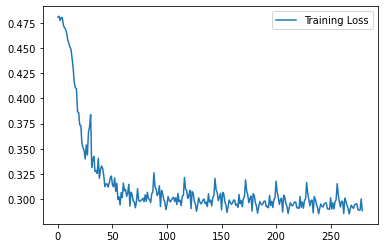

In [24]:
# plot 
plot_loss(train_loss, label='Training Loss')